<a href="https://colab.research.google.com/github/dsarj/tcc_previsao_pulsares/blob/main/pulse_star_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import files
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [2]:
# Lendo arquivo csv tratado
data = files.upload()

Saving pulsar_data_train_clean_2.csv to pulsar_data_train_clean_2.csv


In [3]:
# Obtendo o dataframe do arquivo lido
pulse_star_train = pd.read_csv(next(iter(data.keys())))

ps_df_train = pulse_star_train.copy()

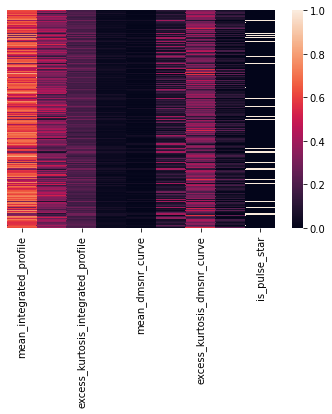

In [4]:
# Exibindo um heatmap
ax = sns.heatmap(ps_df_train, xticklabels=2, yticklabels=False)

0.0    11375
1.0     1153
Name: is_pulse_star, dtype: int64


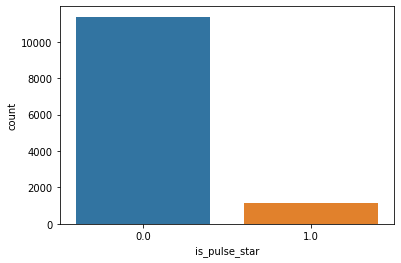

In [5]:
# Verificando balanceamento das classes
print(ps_df_train.is_pulse_star.value_counts())
ax = sns.countplot(x="is_pulse_star", data=ps_df_train)

In [6]:
# Preparando o train test split
X=ps_df_train.drop("is_pulse_star",axis=1)
y=ps_df_train["is_pulse_star"]


In [32]:
# Aplicando o SMOTE para balanceamento das classes
smt = SMOTE()
X, y = smt.fit_resample(X, y)

In [9]:
# Aplicando o BorderlineSMOTE para balanceamento das classes
bsmt = BorderlineSMOTE()
X, y = bsmt.fit_resample(X,y)

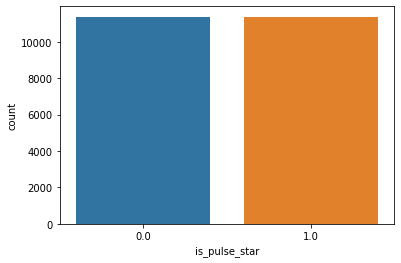

In [10]:
# Verificando balanceamento após SMOTE
ax = sns.countplot(x=y)

In [11]:
# Aplicando o train test split com 70% da base para treinamento
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 18, test_size = 0.3, stratify=y)


In [35]:
# Aplicando standard scaler no modelo
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
val_X = sc.fit_transform(val_X)

In [12]:
# RANDOM FOREST REGRESSOR
# Método que calcula acurácia do RANDOM FOREST REGRESSOR recebendo um n_estimators
def calculateAccuracyRF(num_estimators):
  
  print("N_Estimator: {}".format(num_estimators)) 
  
  forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=18)
  forest_model.fit(train_X, train_y)

  y_pred_train = forest_model.predict(val_X)

  fm_score = forest_model.score(val_X, val_y)

  print(fm_score)

  acuracia = accuracy_score(val_y, y_pred_train.astype(int), normalize=True, sample_weight=None)

  print("Acurácia do teste: {:.2f}%".format(acuracia * 100))
  print(confusion_matrix(val_y,y_pred_train.astype(int)))
  print(classification_report(val_y,y_pred_train.astype(int)))
  print("----------------------------------------------------")

 

In [13]:
# Verificando que quanto menor o numero de estimators maior a precisao do teste
# Vou usar estimators entre 1 e 20
for n_estimat in [1,5,10,20]:
  calculateAccuracyRF(n_estimat)

N_Estimator: 1
0.8763369936821799
Acurácia do teste: 96.91%
[[3286  127]
 [  84 3328]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      3413
         1.0       0.96      0.98      0.97      3412

    accuracy                           0.97      6825
   macro avg       0.97      0.97      0.97      6825
weighted avg       0.97      0.97      0.97      6825

----------------------------------------------------
N_Estimator: 5
0.9283809508434236
Acurácia do teste: 95.58%
[[3383   30]
 [ 272 3140]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      3413
         1.0       0.99      0.92      0.95      3412

    accuracy                           0.96      6825
   macro avg       0.96      0.96      0.96      6825
weighted avg       0.96      0.96      0.96      6825

----------------------------------------------------
N_Estimator: 10
0.9330168483788452
Acurácia do teste: 93.88%
[[338

In [14]:
# Calcula acurácia de um modelo, dados suas predicoes e validações
def calculateAccuracy(y_pred_train, val_y):
  acuracia = accuracy_score(val_y, y_pred_train.astype(int), normalize=True)

  print("Acurácia do teste: {:.2f}%".format(acuracia * 100))
  print(confusion_matrix(val_y,y_pred_train.astype(int)))
  print(classification_report(val_y,y_pred_train.astype(int)))
  print("----------------------------------------------------")


In [15]:
# Modelo REGRESSÃO LOGÍSTICA
model_reg_log = LogisticRegression(
    multi_class = 'multinomial',
    fit_intercept = False
)
model_reg_log.fit(train_X, train_y)

y_pred_train_reg_log = model_reg_log.predict(val_X)

mrl_score = model_reg_log.score(val_X, val_y)

print(mrl_score)

calculateAccuracy(y_pred_train_reg_log, val_y)

0.8887912087912088
Acurácia do teste: 88.88%
[[3031  382]
 [ 377 3035]]
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      3413
         1.0       0.89      0.89      0.89      3412

    accuracy                           0.89      6825
   macro avg       0.89      0.89      0.89      6825
weighted avg       0.89      0.89      0.89      6825

----------------------------------------------------


In [16]:
# Modelo de ÁRVORE DE DECISÃO
decision_tree_model = DecisionTreeRegressor(
    random_state = 10
)

decision_tree_model.fit(train_X, train_y)

y_pred_train_dec_tree = decision_tree_model.predict(val_X)

dtm_score = decision_tree_model.score(val_X, val_y)

print(dtm_score)

calculateAccuracy(y_pred_train_dec_tree, val_y)

0.8886446862540957
Acurácia do teste: 97.22%
[[3294  119]
 [  71 3341]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      3413
         1.0       0.97      0.98      0.97      3412

    accuracy                           0.97      6825
   macro avg       0.97      0.97      0.97      6825
weighted avg       0.97      0.97      0.97      6825

----------------------------------------------------


In [17]:
# Modelo de REGRESSÃO LINEAR

linear_regression_model = LinearRegression()#make_pipeline(StandardScaler(with_mean=True), LinearRegression())#LinearRegression()

linear_regression_model.fit(train_X, train_y)

y_pred_train_lin_reg = linear_regression_model.predict(val_X)

lrm_score = linear_regression_model.score(val_X, val_y)

print(lrm_score)

calculateAccuracy(y_pred_train_lin_reg, val_y)

0.6832038340158888
Acurácia do teste: 62.45%
[[3401   12]
 [2551  861]]
              precision    recall  f1-score   support

         0.0       0.57      1.00      0.73      3413
         1.0       0.99      0.25      0.40      3412

    accuracy                           0.62      6825
   macro avg       0.78      0.62      0.56      6825
weighted avg       0.78      0.62      0.56      6825

----------------------------------------------------
